roc curve 

In [1]:
import pandas as pd
from deepface import DeepFace
from chefboost import Chefboost as chef #for threshold 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)
instances = df[["file_x", "file_y"]].values.tolist()

facenet model cosine distance

In [3]:
model_name = "Facenet"
distance_metric = "euclidean"

In [4]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 344/344 [27:36<00:00,  4.81s/it] 


In [5]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.5479967594146729  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  95.34883720930233 % on  344  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[281, 12], [4, 47]]
Precision:  95.9044 %, Recall:  98.5965 %, F1:  97.2318 %


<AxesSubplot:ylabel='Density'>

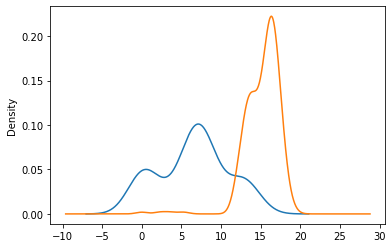

In [6]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [11]:
threshold = 0.4759 #comes from c4.5 algorithm

In [12]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])

In [13]:
facenet_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
facenet_pivot["threshold"] = thresholds

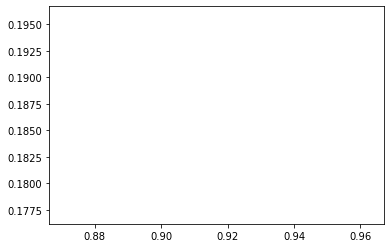

In [14]:
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr) #roc curve of facenet using cosine distance

OpenFace model cosine distance

In [21]:
model_name = "OpenFace"
distance_metric = "euclidean"

In [22]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 344/344 [17:32<00:00,  3.06s/it] 


In [23]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.7399985790252686  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  86.04651162790698 % on  344  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[285, 48], [0, 11]]
Precision:  85.5856 %, Recall:  100.0 %, F1:  92.233 %


<AxesSubplot:ylabel='Density'>

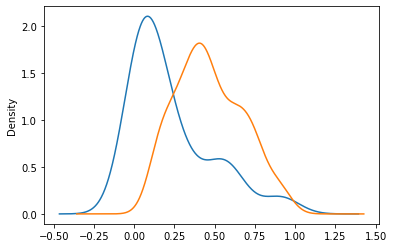

In [24]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [25]:
threshold = 0.2825 #comes from c4.5 algorithm

In [26]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])

In [27]:
openface_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
openface_pivot["threshold"] = thresholds

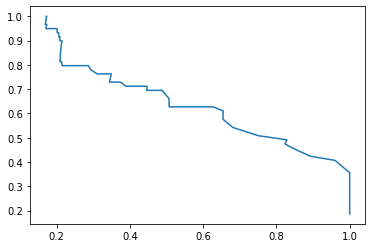

In [28]:
plt.plot(openface_pivot.fpr,openface_pivot.tpr) #roc curve of openface using cosine distance

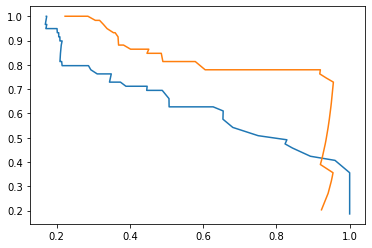

In [29]:
plt.plot(openface_pivot.fpr,openface_pivot.tpr)
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr)

VGG-Face model cosine distance

In [30]:
model_name = "VGG-Face"
distance_metric = "euclidean"

In [ ]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification:  10%|▉         | 34/344 [07:12<1:05:18, 12.64s/it]

In [26]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.5219981670379639  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  86.36363636363636 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[23, 6], [0, 15]]
Precision:  79.3103 %, Recall:  100.0 %, F1:  88.4615 %


In [ ]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [27]:
threshold = 0.0900 #comes from c4.5 algorithm

In [28]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])

In [29]:
vggface_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
vggface_pivot["threshold"] = thresholds

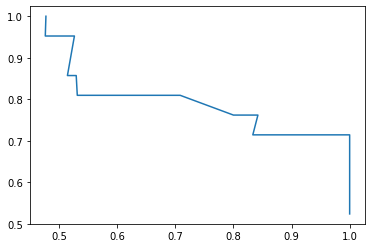

In [30]:
plt.plot(vggface_pivot.fpr,vggface_pivot.tpr)

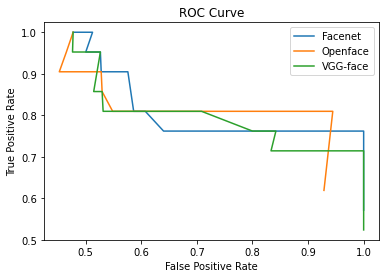

In [31]:
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr,label='Facenet')
plt.plot(openface_pivot.fpr,openface_pivot.tpr,label='Openface')
plt.plot(vggface_pivot.fpr,vggface_pivot.tpr,label='VGG-face')
# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()